In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
housing_prices = pd.read_csv('C:/Users/siddu/Desktop/MSBA SCHOOL WORK/Housing_Prices_24.csv')
housing_prices

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,0,Inside,1Fam,2003,2003,PConc,Y,Gd,Y,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,0,FR2,1Fam,1976,1976,CBlock,Y,TA,Y,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,0,Inside,1Fam,2001,2002,PConc,Y,Gd,Y,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,0,Corner,1Fam,1915,1970,BrkTil,Y,Gd,Y,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,0,FR2,1Fam,2000,2000,PConc,Y,Gd,Y,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,7917,953,953,694,2,1,3,7,...,0,Inside,1Fam,1999,2000,PConc,Y,TA,Y,2007
1456,1457,210000,13175,1542,2073,0,2,0,3,7,...,0,Inside,1Fam,1978,1988,CBlock,Y,TA,Y,2010
1457,1458,266500,9042,1152,1188,1152,2,0,4,9,...,0,Inside,1Fam,1941,2006,Stone,Y,Gd,Y,2010
1458,1459,142125,9717,1078,1078,0,1,0,2,5,...,0,Inside,1Fam,1950,1996,CBlock,Y,Gd,Y,2010


In [3]:


housing_prices_no_cate = housing_prices.drop(columns=['LotConfig', 'BldgType', 'Foundation', 'CentralAir','KitchenQual','PavedDrive'])
housing_prices_no_cate

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,2,0,61,0,0,0,0,2003,2003,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,2,298,0,0,0,0,0,1976,1976,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,2,0,42,0,0,0,0,2001,2002,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,3,0,35,272,0,0,0,1915,1970,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,3,192,84,0,0,0,0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,7917,953,953,694,2,1,3,7,...,2,0,40,0,0,0,0,1999,2000,2007
1456,1457,210000,13175,1542,2073,0,2,0,3,7,...,2,349,0,0,0,0,0,1978,1988,2010
1457,1458,266500,9042,1152,1188,1152,2,0,4,9,...,1,0,60,0,0,0,0,1941,2006,2010
1458,1459,142125,9717,1078,1078,0,1,0,2,5,...,1,366,0,112,0,0,0,1950,1996,2010


           SalePrice        LotArea  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count    1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean   180921.195890   10516.828082  1057.429452  1162.626712   346.992466   
std     79442.502883    9981.264932   438.705324   386.587738   436.528436   
min     34900.000000    1300.000000     0.000000   334.000000     0.000000   
25%    129975.000000    7553.500000   795.750000   882.000000     0.000000   
50%    163000.000000    9478.500000   991.500000  1087.000000     0.000000   
75%    214000.000000   11601.500000  1298.250000  1391.250000   728.000000   
max    755000.000000  215245.000000  6110.000000  4692.000000  2065.000000   

          FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean      1.565068     0.382877      2.866438      6.517808     0.613014   
std       0.550916     0.502885      0.815778      1.625393     0.644

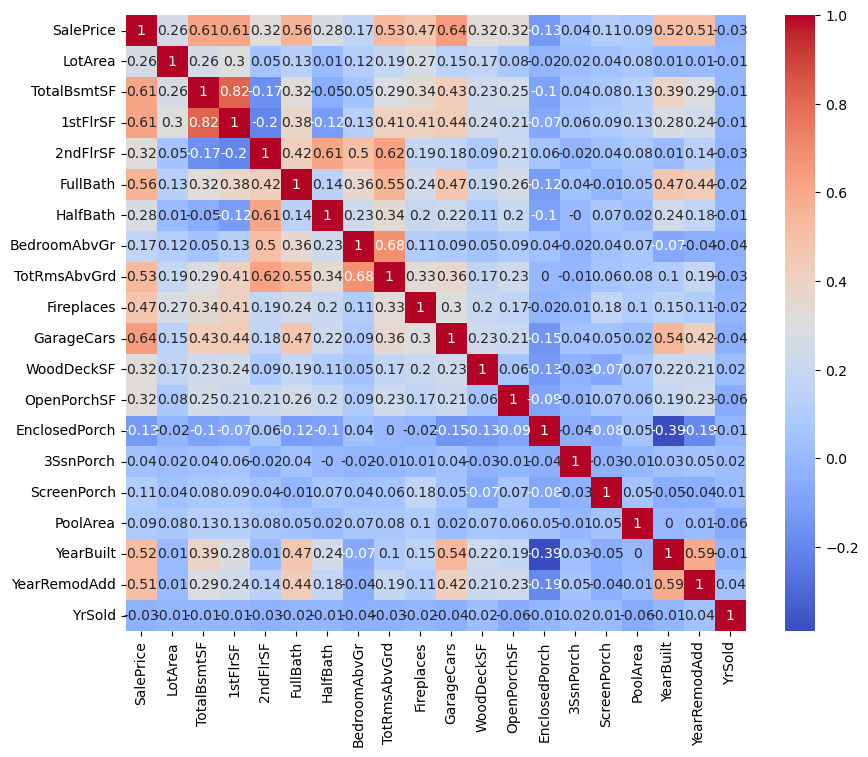

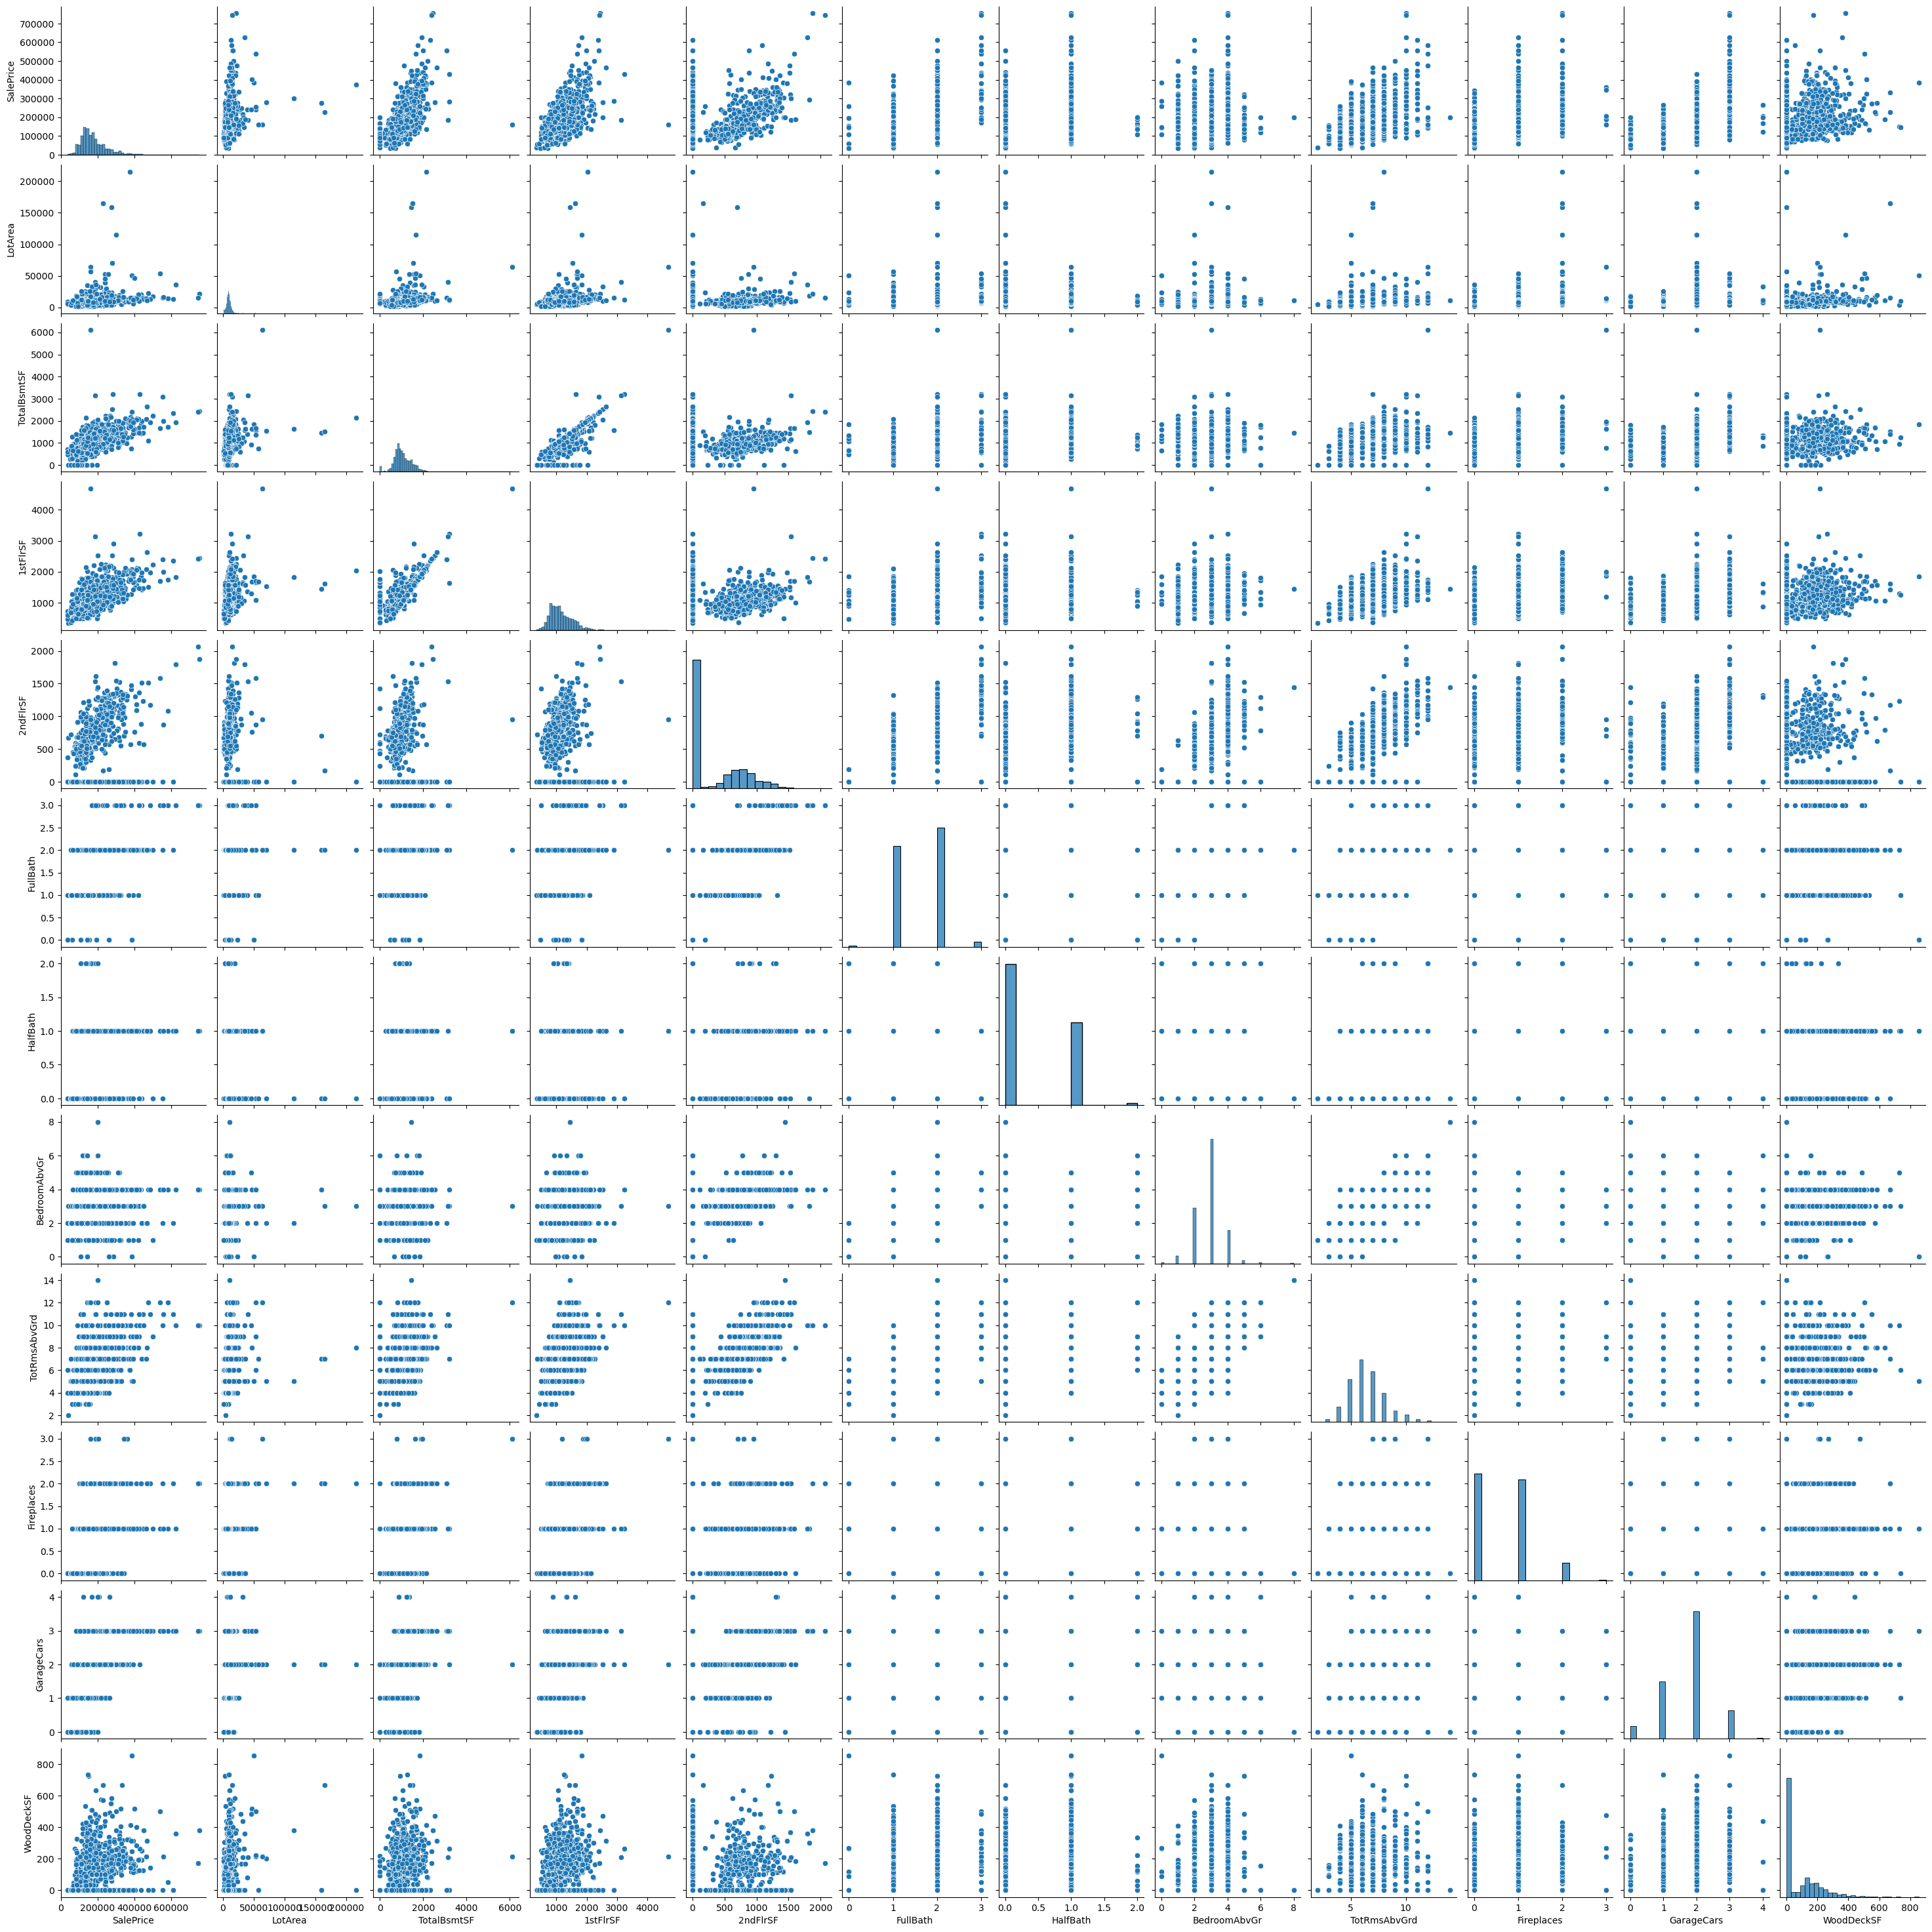

In [10]:
#create scatterplot
print(housing_prices_no_cate.describe())

correlations_matrix_nocate = housing_prices_no_cate.corr()
correlations_matrix_nocate = correlations_matrix_nocate.round(2)  # Round to two decimal places

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_matrix_nocate, annot=True, cmap='coolwarm')
plt.show()

# Create a scatterplot matrix for the first 12 numerical variables (adjust if you have fewer variables)
sns.pairplot(housing_prices_no_cate.iloc[:, :12])  # Adjust the slice as necessary based on your dataset
plt.show()

In [4]:
# Fit full regression
X = housing_prices_no_cate.drop(columns=['SalePrice'])
y = housing_prices_no_cate['SalePrice']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:23:08   Log-Likelihood:                -17516.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1439   BIC:                         3.519e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.716e+05   1.58e+06     -0.488

In [5]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included

In [6]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  const with p-value 0.0000
Add  GarageCars with p-value 0.0000
Add  TotalBsmtSF with p-value 0.0000
Add  2ndFlrSF with p-value 0.0000
Add  YearRemodAdd with p-value 0.0000
Add  1stFlrSF with p-value 0.0000
Add  YearBuilt with p-value 0.0000
Add  Fireplaces with p-value 0.0000
Add  BedroomAbvGr with p-value 0.0000
Add  WoodDeckSF with p-value 0.0004
Add  ScreenPorch with p-value 0.0009
Add  TotRmsAbvGrd with p-value 0.0014
Add  LotArea with p-value 0.0011
resulting features:
['const', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']


In [17]:
# Fit model with selected features
X = housing_prices_no_cate[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     369.2
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:30:13   Log-Likelihood:                -17521.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1447   BIC:                         3.514e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.811e+06    1.2e+05    -15.130   

In [10]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)

         Variable           VIF
0           const  2.327048e+06
1              Id  1.013572e+00
2         LotArea  1.172562e+00
3     TotalBsmtSF  3.482324e+00
4        1stFlrSF  5.597009e+00
5        2ndFlrSF  4.832845e+00
6        FullBath  2.639452e+00
7        HalfBath  2.136282e+00
8    BedroomAbvGr  2.130529e+00
9    TotRmsAbvGrd  4.352000e+00
10     Fireplaces  1.456012e+00
11     GarageCars  1.856250e+00
12     WoodDeckSF  1.170610e+00
13    OpenPorchSF  1.191487e+00
14  EnclosedPorch  1.241887e+00
15      3SsnPorch  1.016901e+00
16    ScreenPorch  1.093724e+00
17       PoolArea  1.066410e+00
18      YearBuilt  2.865800e+00
19   YearRemodAdd  1.740687e+00
20         YrSold  1.015357e+00


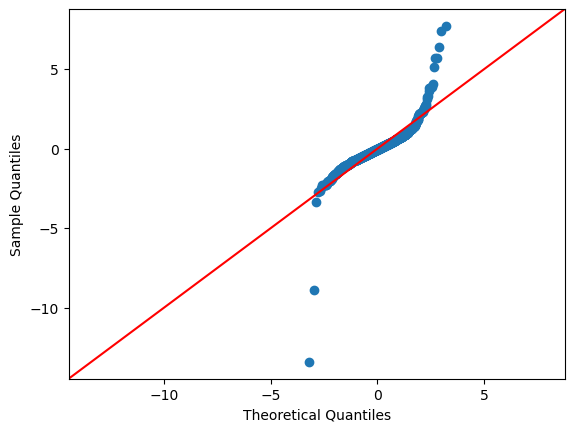

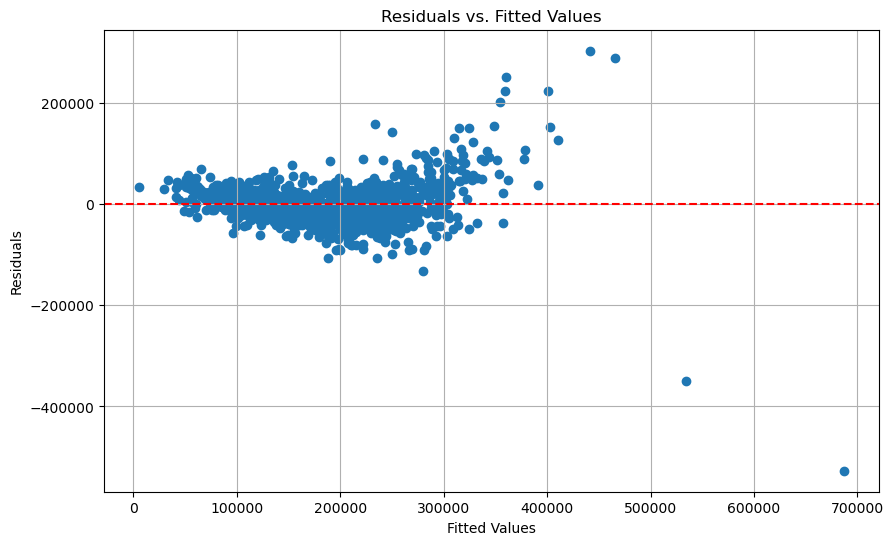

In [11]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [18]:
X = housing_prices_no_cate[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     481.7
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:34:05   Log-Likelihood:                -7396.5
No. Observations:                1460   AIC:                         1.482e+04
Df Residuals:                    1447   BIC:                         1.489e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2142.6890    116.548    -18.385   

In [ ]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [32]:

X = housing_prices[['LotConfig', 'BldgType', 'Foundation', 'CentralAir', 'KitchenQual', 'PavedDrive','GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF','YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch','TotRmsAbvGrd', 'LotArea']]
X = pd.get_dummies(X, columns=['LotConfig', 'BldgType', 'Foundation', 'CentralAir', 'KitchenQual', 'PavedDrive'], drop_first=True,dtype= 'float')
X = sm.add_constant(X)

sqrty = np.sqrt(y)
sqrtreg2 = sm.OLS(sqrty, X).fit()
print(sqrtreg2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     348.5
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:26:03   Log-Likelihood:                -7281.9
No. Observations:                1460   AIC:                         1.461e+04
Df Residuals:                    1439   BIC:                         1.472e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1527.0343    134.596    -

In [33]:
X = housing_prices[[  'CentralAir', 'KitchenQual','GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF','YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch','TotRmsAbvGrd', 'LotArea']]
X = pd.get_dummies(X, columns=['CentralAir', 'KitchenQual'], drop_first=True,dtype= 'float')
X = sm.add_constant(X)

sqrty = np.sqrt(y)
sqrtreg2 = sm.OLS(sqrty, X).fit()
print(sqrtreg2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     416.9
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:26:08   Log-Likelihood:                -7310.0
No. Observations:                1460   AIC:                         1.465e+04
Df Residuals:                    1443   BIC:                         1.474e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1410.2415    135.765    -10.

In [ ]:
# Calculate residuals
residuals = sqrtreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [55]:
# log transformed regression
X = housing_prices[[ 'CentralAir', 'KitchenQual', 'PavedDrive','GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF','YearBuilt', 'Fireplaces', 'WoodDeckSF', 'ScreenPorch','TotRmsAbvGrd']]
X = pd.get_dummies(X, columns=[ 'CentralAir', 'KitchenQual', 'PavedDrive'], drop_first=True,dtype= 'float')
X = sm.add_constant(X)
logy = np.log(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     417.1
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:51:47   Log-Likelihood:                 529.47
No. Observations:                1460   AIC:                            -1025.
Df Residuals:                    1443   BIC:                            -935.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6318      0.633      4.

In [ ]:
# Calculate residuals
residuals = logreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
data_path = 'C:/Users/siddu/Desktop/MSBA SCHOOL WORK/Homesforsale.csv' 
new_dat = pd.read_csv(data_path)

# Create X-matrix for regression (e.g., add / delete / modify any variables that were added / deleted / modified when creating the model)

Xnew = new_dat[['CentralAir', 'KitchenQual', 'PavedDrive','GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF','YearBuilt', 'Fireplaces', 'WoodDeckSF', 'ScreenPorch','TotRmsAbvGrd']]
Xnew = pd.get_dummies(Xnew, columns=['CentralAir', 'KitchenQual', 'PavedDrive'], drop_first=True,dtype='float')
Xnew = sm.add_constant(Xnew)

# make predictions

predictions = logreg.predict(Xnew)
print(predictions)